Data Collection

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [272]:
df = pd.read_csv('spam.csv')

In [273]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [274]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [275]:
from scikit-learn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [276]:
df['target'] = encoder.fit_transform(df['target'])

In [277]:
df = df.drop_duplicates(keep='first')

In [278]:
!pip install nltk

In [279]:
import nltk

In [280]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SAI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [281]:
df['num_characters'] = df['text'].apply(len)

In [282]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [283]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

Proessing the Data to reduce the text


Steps
1) Lower case
2) tokenization
3) Removing special characters
4) Removing stopwords and punctions
5) stemming

In [284]:
from nltk.corpus import stopwords
import string

In [285]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [286]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [287]:
#A singl efunction to do all these steps
def transform_text(text):
    text = text.lower() #step 1
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i);
    text = y[:] # this makes shalow copy now if we clear y it will not clear text and text is an list
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i);
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i)) # to stem down loving to love and remove e and ings etc.
    return " ".join(y)
    

In [288]:
transform_text("""Hi Mayank Manchanda,

We wanted to sit down and share something with all of you today. 9 million of you, who are a part of the Unstop community. From a small hostel room in IMT Ghaziabad, we’ve grown to a community that is unstoppable together.
March 2024 was an important month for us with the Unstop Talent Meet 2024. It was wonderful to see students, like you, come together and celebrate your wins on the playground of opportunities. With 500+ HRs, University Partners, and Students in the audience, Rahul Subramaninan made sure to keep everyone engaged, as the host of the show.

On this day, we also introduced and recognized 2 brand new categories - Unstoppable Campus Ambassadors 2024 and Unstoppable Mentors 2024. And not to forget, the Unstoppable Leaders. Have a look at the winners here. 
Kudos to Nabil Akhtar Symbiosis Institute of Business Management (SIBM), Pune, Uttaran Nayak, Maulana Azad National Institute of Technology (MANIT), Bhopal and Shivam Meet, Kirori Mal College (KMC), University of Delhi for bagging the All India Unstoppable Rank 1 in B-School, E-School, and UG Colleges respectively. 

As you know, we are always working towards enhancing your user experience and journey on Unstop. 
Mentor Match: With the Mentor Match feature, your profile will be analyzed and we’ll connect you with the right mentor!
Complete your profile: Fill all those fields and make sure your profile is complete so that recruiters can view your profile!
Still haven’t gone Pro?: Unstop Pro, a chance to give your career a boost through specialized courses on topics like Aptitude, Next-Gen Skills, Coding, Full Stack, and much more! Have a look here: https://unstop.com/pro
We’ve seen a lot of you make the best out of all challenges. To mention a few, Flipkart GRiD 2023 saw 4,76,000+ registrations ie., 2X the registrations of CAT 2023. Walmart Codehers 2024 was renewed for another season and with 96,300+ registrations, it showed how the future is for female coders. 
We cannot be more excited to unveil what we have in store for all of you this year. We look forward to this year being bigger and better with more opportunities for all of you to unlock your potential.

Regards,
Team Unstop""")

'hi mayank manchanda want sit share someth today 9 million part unstop commun small hostel room imt ghaziabad grown commun unstopp togeth march 2024 import month us unstop talent meet wonder see student like come togeth celebr win playground opportun hr univers partner student audienc rahul subramaninan made sure keep everyon engag host show day also introduc recogn 2 brand new categori unstopp campu ambassador 2024 unstopp mentor forget unstopp leader look winner kudo nabil akhtar symbiosi institut busi manag sibm pune uttaran nayak maulana azad nation institut technolog manit bhopal shivam meet kirori mal colleg kmc univers delhi bag india unstopp rank 1 ug colleg respect know alway work toward enhanc user experi journey unstop mentor match mentor match featur profil analyz connect right mentor complet profil fill field make sure profil complet recruit view profil still gone pro unstop pro chanc give career boost special cours topic like aptitud skill code full stack much look http s

In [289]:
#creating new column with transformed_text
df['transformed_text'] = df['text'].apply(transform_text)

In [290]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [291]:
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [292]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

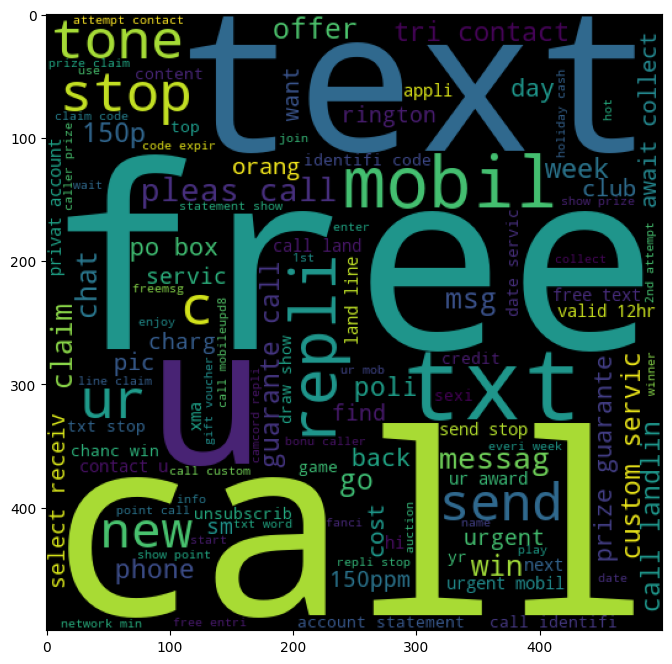

In [293]:
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)
plt.show()

In [294]:
notSpam_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

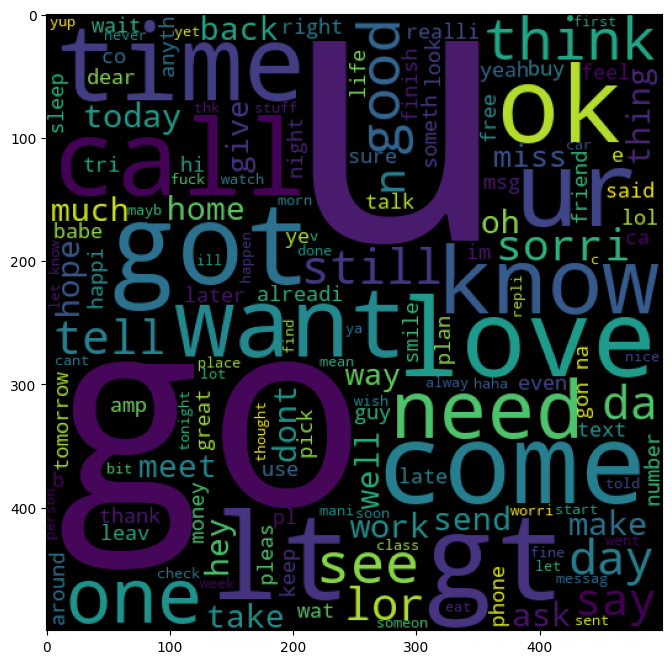

In [295]:
plt.figure(figsize=(12,8))
plt.imshow(notSpam_wc)
plt.show()

In [296]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [297]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [298]:
spam_corpus


['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [299]:
len(spam_corpus)

9941

In [302]:
#same is for not spam words

Building and testing different Models

In [303]:
from scikit-learn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [304]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [305]:
X.shape

(5169, 3000)

In [306]:
y = df['target'].values

In [307]:
from scikit-learn.model_selection import train_test_split

In [308]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [309]:
from scikit-learn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from scikit-learn.metrics import accuracy_score,confusion_matrix,precision_score

In [310]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [311]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8704061895551257
[[788 108]
 [ 26 112]]
0.509090909090909


In [312]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [313]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [314]:
#till now it is important to foxus more on precision thus MultinomialNB is best till now

In [315]:
# tfidf --> MNB

In [316]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates f

In [317]:
!pip install xgboost

In [318]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [319]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [320]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [321]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [322]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [323]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.971953578336557
Precision -  1.0
For  DT
Accuracy -  0.9313346228239845
Precision -  0.8252427184466019
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9696969696969697
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9593810444874274
Precision -  0.8692307692307693
For  ETC
Accuracy -  0.9796905222437138
Precision -  0.975609756097561
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9278350515463918
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9411764705882353


In [324]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [325]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.971954,1.000000
5,RF,0.974855,0.982759
8,ETC,0.979691,0.975610
0,SVC,0.975822,0.974790
4,LR,0.956480,0.969697
6,AdaBoost,0.961315,0.945455
10,xgb,0.968085,0.941176
9,GBDT,0.946809,0.927835
7,BgC,0.959381,0.869231


In [326]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [327]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.971954
2,RF,Accuracy,0.974855
3,ETC,Accuracy,0.979691
4,SVC,Accuracy,0.975822
5,LR,Accuracy,0.956480
6,AdaBoost,Accuracy,0.961315
7,xgb,Accuracy,0.968085
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.959381


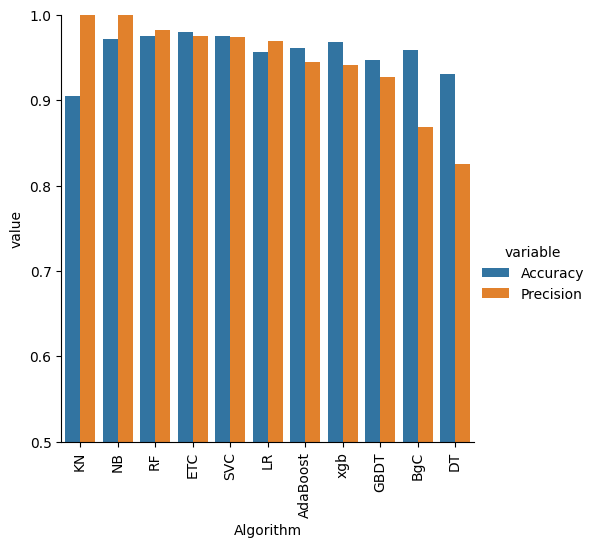

In [328]:
sn.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [329]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [330]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [331]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [332]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [333]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [334]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
2,RF,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
3,ETC,0.979691,0.975610,0.979691,0.975610,0.979691,0.975610,0.979691,0.975610
4,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
5,LR,0.956480,0.969697,0.956480,0.969697,0.956480,0.969697,0.956480,0.969697
6,AdaBoost,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455
7,xgb,0.968085,0.941176,0.968085,0.941176,0.968085,0.941176,0.968085,0.941176
8,GBDT,0.946809,0.927835,0.946809,0.927835,0.946809,0.927835,0.946809,0.927835
9,BgC,0.959381,0.869231,0.959381,0.869231,0.959381,0.869231,0.959381,0.869231


In [335]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [336]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [337]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [338]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9918032786885246


In [339]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [340]:
from sklearn.ensemble import StackingClassifier

In [341]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [342]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.946969696969697


In [343]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred1))
print("Precision",precision_score(y_test,y_pred1))

Accuracy 0.971953578336557
Precision 1.0


In [344]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))